Performance of Logistic Regression:
Accuracy: 1.00
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        19
      Medium       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



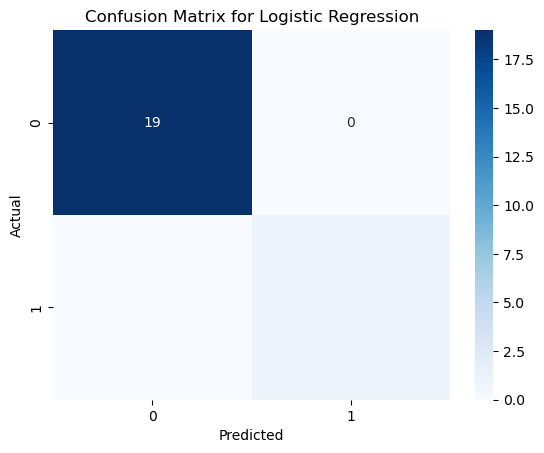

Performance of SVM:
Accuracy: 0.95
              precision    recall  f1-score   support

         Low       0.95      1.00      0.97        19
      Medium       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



C:\Users\Nina Lin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nina Lin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nina Lin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


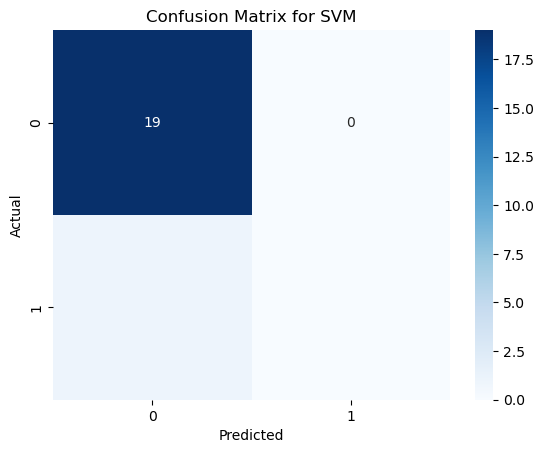

Performance of Random Forest:
Accuracy: 1.00
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        19
      Medium       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



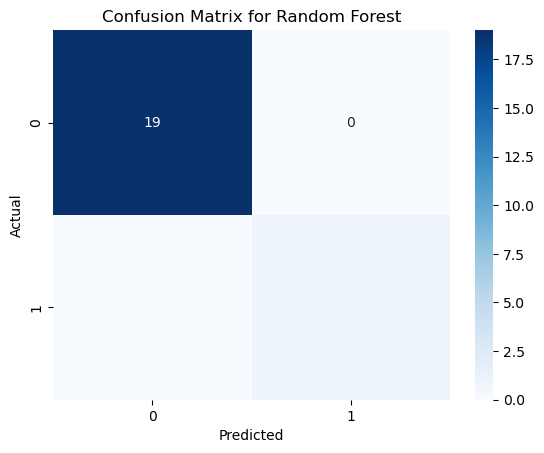

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training dataset
adjusted_data_file = 'Adjusted_Ability_to_Abstract_Analysis.csv'
training_data = pd.read_csv(adjusted_data_file)

# Encode categorical columns
le_data_type = LabelEncoder()
le_dtu = LabelEncoder()
le_aa = LabelEncoder()
training_data['Data_Type_encoded'] = le_data_type.fit_transform(training_data['Data Type'])
training_data['DTU_encoded'] = le_dtu.fit_transform(training_data['DTU'])
training_data['AA_encoded'] = le_aa.fit_transform(training_data['AA Level'])

# Define features (X) and target (y)
X = training_data[['Job Zone', 'STEM Level', 'Data_Type_encoded', 'DTU_encoded']]
y = training_data['AA_encoded']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
logistic_model = LogisticRegression(random_state=42)
svm_model = SVC(probability=True, random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Train the models
logistic_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Predict on the test set
logistic_preds = logistic_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
random_forest_preds = random_forest_model.predict(X_test)

# Define a function to evaluate models
def evaluate_model(name, y_true, y_pred, encoder):
    print(f"Performance of {name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")

    # Get the classes present in y_true and y_pred to avoid mismatch error
    unique_labels = sorted(list(set(y_true) | set(y_pred)))
    class_names = [encoder.inverse_transform([label])[0] for label in unique_labels]
    
    print(classification_report(y_true, y_pred, labels=unique_labels, target_names=class_names))

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=unique_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# Evaluate Logistic Regression
evaluate_model("Logistic Regression", y_test, logistic_preds, le_aa)

# Evaluate SVM
evaluate_model("SVM", y_test, svm_preds, le_aa)

# Evaluate Random Forest
evaluate_model("Random Forest", y_test, random_forest_preds, le_aa)


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Load the training dataset
adjusted_data_file = 'Adjusted_Ability_to_Abstract_Analysis.csv'
training_data = pd.read_csv(adjusted_data_file)

# Encode categorical columns
le_data_type = LabelEncoder()
le_dtu = LabelEncoder()
le_aa = LabelEncoder()
training_data['Data_Type_encoded'] = le_data_type.fit_transform(training_data['Data Type'])
training_data['DTU_encoded'] = le_dtu.fit_transform(training_data['DTU'])
training_data['AA_encoded'] = le_aa.fit_transform(training_data['AA Level'])

# Define features (X) and target (y)
X = training_data[['Job Zone', 'STEM Level', 'Data_Type_encoded', 'DTU_encoded']]
y = training_data['AA_encoded']

# Initialize the models
logistic_model = LogisticRegression(random_state=42)
svm_model = SVC(probability=True, random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Use K-Fold Cross-Validation with Stratified Splits to maintain class balance
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define a function to perform cross-validation
def perform_cross_validation(model, model_name, X, y, cv):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Cross-Validation Accuracy for {model_name}:")
    print(f"Scores: {scores}")
    print(f"Mean Accuracy: {np.mean(scores):.2f}")
    print(f"Standard Deviation: {np.std(scores):.2f}")
    print("-" * 40)

# Perform Cross-Validation on Logistic Regression
perform_cross_validation(logistic_model, "Logistic Regression", X, y, kfold)

# Perform Cross-Validation on SVM
perform_cross_validation(svm_model, "SVM", X, y, kfold)

# Perform Cross-Validation on Random Forest
perform_cross_validation(random_forest_model, "Random Forest", X, y, kfold)


C:\Users\Nina Lin\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Nina Lin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nina Lin\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Nina Lin\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: User

Cross-Validation Accuracy for Logistic Regression:
Scores: [0.9  0.95 0.9  0.95 1.  ]
Mean Accuracy: 0.94
Standard Deviation: 0.04
----------------------------------------
Cross-Validation Accuracy for SVM:
Scores: [0.85       0.85       0.85       0.85       0.89473684]
Mean Accuracy: 0.86
Standard Deviation: 0.02
----------------------------------------
Cross-Validation Accuracy for Random Forest:
Scores: [0.9  0.95 0.95 0.9  1.  ]
Mean Accuracy: 0.94
Standard Deviation: 0.04
----------------------------------------


In [5]:
# Load the dataset from combine1.xlsx for testing
file_path = 'combine1.xlsx'
data = pd.ExcelFile(file_path)
test_dataset = data.parse('Sheet1')

# Rename 'Avg. of STEM Level' to 'STEM Level' for consistency
test_dataset = test_dataset.rename(columns={'Avg. of STEM Level': 'STEM Level'})

# Identify the DTU columns to transform
dtu_columns = ["Image DTU", "Audio DTU", "Alphanumeric DTU", "Geographic DTU"]

# Pivot the DTU columns into a long format
transformed_test_dataset = test_dataset.melt(
    id_vars=[col for col in test_dataset.columns if col not in dtu_columns],
    value_vars=dtu_columns,
    var_name="Data Type",
    value_name="DTU Value"
)

# Clean up the "Data Type" column
transformed_test_dataset["Data Type"] = transformed_test_dataset["Data Type"].str.replace(" DTU", "")

# Filter out rows where 'STEM Level' is 'Unknown'
filtered_test_data = transformed_test_dataset[transformed_test_dataset['STEM Level'] != 'Unknown']
filtered_test_data['STEM Level'] = pd.to_numeric(filtered_test_data['STEM Level'], errors='coerce')
filtered_test_data = filtered_test_data.dropna()

# Encode categorical columns for testing set
le_data_type = LabelEncoder()
le_dtu = LabelEncoder()
filtered_test_data['Data_Type_encoded'] = le_data_type.fit_transform(filtered_test_data['Data Type'])
filtered_test_data['DTU_encoded'] = le_dtu.fit_transform(filtered_test_data['DTU Value'])

# Define features (X) for prediction
X_test = filtered_test_data[['Job Zone', 'STEM Level', 'Data_Type_encoded', 'DTU_encoded']]

# Load the training dataset
adjusted_data_file = 'Adjusted_Ability_to_Abstract_Analysis.csv'
training_data = pd.read_csv(adjusted_data_file)

# Encode categorical columns for training dataset
le_aa = LabelEncoder()
training_data['Data_Type_encoded'] = le_data_type.fit_transform(training_data['Data Type'])
training_data['DTU_encoded'] = le_dtu.fit_transform(training_data['DTU'])
training_data['AA_encoded'] = le_aa.fit_transform(training_data['AA Level'])

# Define features (X) and target (y) for training
X_train = training_data[['Job Zone', 'STEM Level', 'Data_Type_encoded', 'DTU_encoded']]
y_train = training_data['AA_encoded']

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict AA levels for the test dataset from combine1.xlsx
filtered_test_data['Predicted_AA_encoded'] = random_forest_model.predict(X_test)

# Map the predicted numeric labels back to their original AA level names
filtered_test_data['Predicted_AA'] = le_aa.inverse_transform(filtered_test_data['Predicted_AA_encoded'])

# Save the updated test dataset with predictions as a new Excel file
output_file_path = 'AA_prediction_combine1_test_set_refitted.xlsx'
filtered_test_data.to_excel(output_file_path, index=False)


'AA_prediction_combine1_test_set_refitted.xlsx'